Данные можно найти по ссылке: https://www.kaggle.com/competitions/passenger-satisfaction-2024

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/kaggle_passangers/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/kaggle_passangers/train.csv')
df_train.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,1,5,4,1,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,5,1,1,5,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,4,4,4,5,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,3,1,2,3,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,0,4,0,4,5,1,2,1,1,3,0,1,5,Satisfied


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      44913 non-null  int64  
 1   Gender                                  44913 non-null  object 
 2   Age                                     44913 non-null  int64  
 3   Customer Type                           44913 non-null  object 
 4   Type of Travel                          44913 non-null  object 
 5   Class                                   44913 non-null  object 
 6   Flight Distance                         44913 non-null  int64  
 7   Departure Delay                         44913 non-null  int64  
 8   Arrival Delay                           44782 non-null  float64
 9   Departure and Arrival Time Convenience  44913 non-null  int64  
 10  Ease of Online Booking                  44913 non-null  in

#Обработка пропусков в test


In [ ]:
arrivals = pd.concat([df_test['Arrival Delay'], df_test['Departure Delay']], axis=1)
arr_t = pd.concat([df_train['Arrival Delay'], df_train['Departure Delay']], axis=1)
arrivals = arrivals[(arrivals['Arrival Delay']) != 0 | (arrivals['Arrival Delay'] != 0)]
arr_t = arr_t[(arr_t['Arrival Delay']) != 0 | (arr_t['Arrival Delay'] != 0)]
arrivals

,Arrival Delay,Departure Delay
0,8.0,0
1,20.0,0
2,3.0,18
6,28.0,12
10,36.0,8
...,...,...
44902,111.0,120
44904,4.0,24
44908,17.0,27
44911,9.0,4


In [ ]:
print(arrivals['Arrival Delay'].isna().sum())
arrivals['diff'] = arrivals['Arrival Delay'] - arrivals['Departure Delay']
arr_t['diff'] = arr_t['Arrival Delay'] - arr_t['Departure Delay']
arr_no_nan = arrivals.dropna()
arr_t_no_nan = arr_t.dropna()
arr_no_nan['diff'].value_counts()

131


<ipython-input-7-3f5673b41dfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrivals['diff'] = arrivals['Arrival Delay'] - arrivals['Departure Delay']
<ipython-input-7-3f5673b41dfa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_t['diff'] = arr_t['Arrival Delay'] - arr_t['Departure Delay']


,count
diff,
2.0,1023
3.0,847
4.0,825
5.0,723
6.0,680
...,...
104.0,1
177.0,1
78.0,1


Корреляция: 0.9591282531541184
Отклонение: 15.020764708696698
Отклонение: 2.874119938083587
train:
Корреляция: 0.9618196732969866
Отклонение: 14.720050922740286
Отклонение: 2.5272968197879857


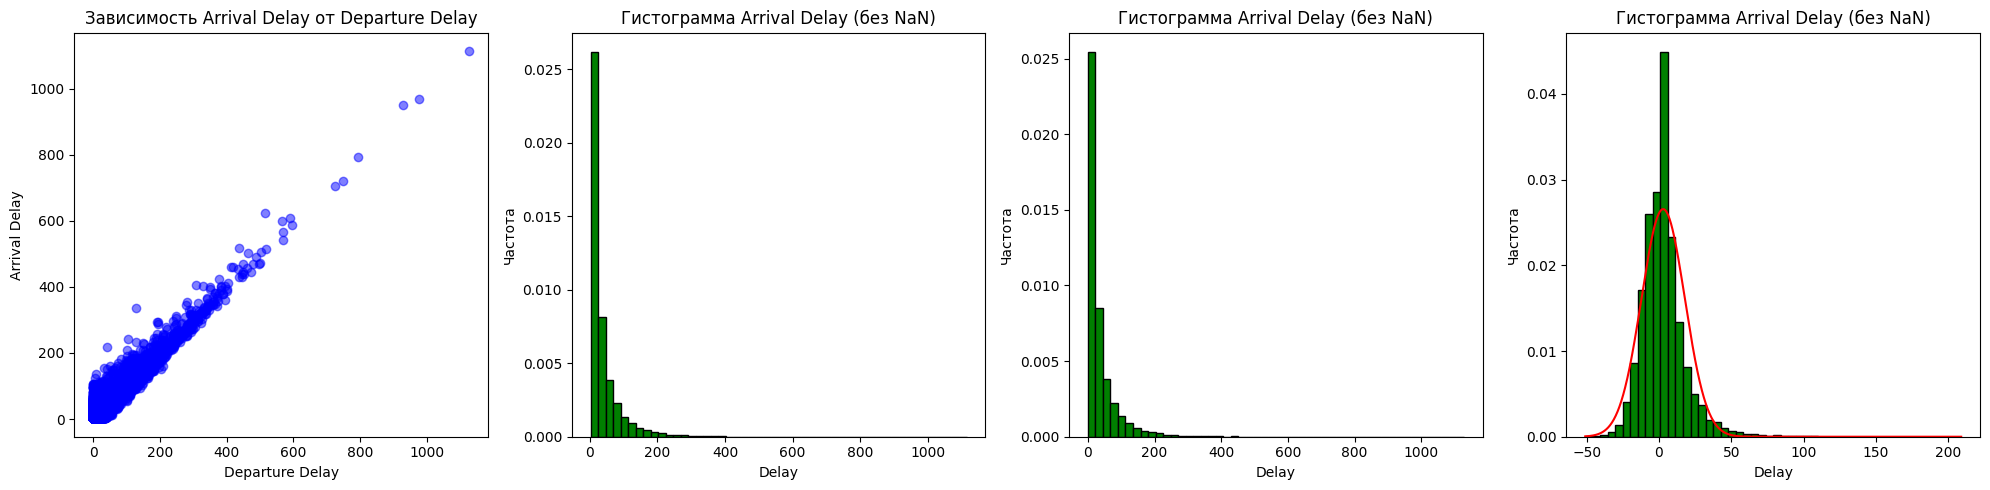

In [ ]:
# Создаём фигуру и оси
fig, ax = plt.subplots(1, 4, figsize=(20, 5))  # 5 графиков в одну линию

# График 1: Зависимость arr_no_nan от dep_no_nan
ax[0].scatter(arr_no_nan['Departure Delay'], arr_no_nan['Arrival Delay'], color='blue', alpha=0.5)
ax[0].set_xlabel('Departure Delay')
ax[0].set_ylabel('Arrival Delay')
ax[0].set_title('Зависимость Arrival Delay от Departure Delay')

for i, name in enumerate(arr_no_nan.columns.tolist()):
  i += 1
  ax[i].hist(arr_no_nan[name], bins=50, color='green', edgecolor='black', density=True)
  ax[i].set_xlabel('Delay')
  ax[i].set_ylabel('Частота')
  ax[i].set_title('Гистограмма Arrival Delay (без NaN)')

correlation = arr_no_nan['Arrival Delay'].corr(arr_no_nan['Departure Delay'])
std_diff = arr_no_nan['diff'].std()
mean_diff = arr_no_nan['diff'].mean()
print(f"Корреляция: {correlation}")
print(f'Отклонение: {std_diff}')
print(f'Отклонение: {mean_diff}')
print('train:')

correlation_t = arr_t_no_nan['Arrival Delay'].corr(arr_t_no_nan['Departure Delay'])
std_diff_t = arr_t_no_nan['diff'].std()
mean_diff_t = arr_t_no_nan['diff'].mean()
print(f"Корреляция: {correlation_t}")
print(f'Отклонение: {std_diff_t}')
print(f'Отклонение: {mean_diff_t}')

x = np.linspace(min(arr_no_nan['diff']), max(arr_no_nan['diff']), 1000)  # Диапазон значений x
pdf = norm.pdf(x, loc=mean_diff, scale=std_diff)  # Плотность нормального распределения

# Нанесение кривой нормального распределения
ax[3].plot(x, pdf, 'r-')
# Настройка отображения
plt.tight_layout()  # Чтобы графики не накладывались друг на друга
plt.show()

График представляет собой практически прямую и это подтвеждает коэффициент корреляции = 0.96 и вид распределения, близкий к нормальному. Заполним пропуски значениями с учетом распределения

In [ ]:
np.random.seed(42)
missing_indices = arrivals['diff'].isna()
missing_indices_t = arr_t['diff'].isna()
random_values = np.random.normal(loc=mean_diff, scale=std_diff, size=missing_indices.sum())
random_values_t = np.random.normal(loc=mean_diff_t, scale=std_diff_t, size=missing_indices_t.sum())
arrivals.loc[missing_indices, 'diff'] = random_values
arr_t.loc[missing_indices_t, 'diff'] = random_values_t
arrivals['Arrival Delay'] = arrivals['Departure Delay'] + arrivals['diff']
arr_t['Arrival Delay'] = arr_t['Departure Delay'] + arr_t['diff']
print(arrivals['Arrival Delay'])

0          8.0
1         20.0
2          3.0
6         28.0
10        36.0
         ...  
44902    111.0
44904      4.0
44908     17.0
44911      9.0
44912     13.0
Name: Arrival Delay, Length: 20158, dtype: float64


In [ ]:
df_test.loc[arrivals.index, 'Arrival Delay'] = arrivals['Arrival Delay']
df_train.loc[arr_t.index, 'Arrival Delay'] = arr_t['Arrival Delay']
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      44913 non-null  int64  
 1   Gender                                  44913 non-null  object 
 2   Age                                     44913 non-null  int64  
 3   Customer Type                           44913 non-null  object 
 4   Type of Travel                          44913 non-null  object 
 5   Class                                   44913 non-null  object 
 6   Flight Distance                         44913 non-null  int64  
 7   Departure Delay                         44913 non-null  int64  
 8   Arrival Delay                           44913 non-null  float64
 9   Departure and Arrival Time Convenience  44913 non-null  int64  
 10  Ease of Online Booking                  44913 non-null  in

#Обработка категориальных признаков

In [ ]:
df_cat = df_train[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']].copy()
df_c = df_test[['Gender', 'Customer Type', 'Type of Travel', 'Class']].copy()
print(df_cat.info())
print(df_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          84967 non-null  object
 1   Customer Type   84967 non-null  object
 2   Type of Travel  84967 non-null  object
 3   Class           84967 non-null  object
 4   Satisfaction    84967 non-null  object
dtypes: object(5)
memory usage: 3.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44913 entries, 0 to 44912
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          44913 non-null  object
 1   Customer Type   44913 non-null  object
 2   Type of Travel  44913 non-null  object
 3   Class           44913 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB
None


Посмотрим на пул каждого из признаков и начнем с таргета


In [ ]:
print(df_cat['Satisfaction'].value_counts())

Satisfaction
Satisfied                  51914
Neutral or Dissatisfied    33053
Name: count, dtype: int64


In [ ]:
df_cat['Satisfaction'] = df_cat['Satisfaction'].replace(['Satisfied', 'Neutral or Dissatisfied'], [1, 0]).infer_objects(copy=False).astype(int)

<ipython-input-13-a82e8c896f6f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat['Satisfaction'] = df_cat['Satisfaction'].replace(['Satisfied', 'Neutral or Dissatisfied'], [1, 0]).infer_objects(copy=False).astype(int)


In [ ]:
print(df_cat['Gender'].value_counts())
print(df_c['Gender'].value_counts())

Gender
Female    42927
Male      42040
Name: count, dtype: int64
Gender
Female    22972
Male      21941
Name: count, dtype: int64


В обоих выборках примерно одинковое количество полов с перевесом в сторону женщин, что говорит о схожих распределениях

In [ ]:
df_cat.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,Returning,Business,Business,1
1,Male,Returning,Business,Business,0
2,Female,Returning,Business,Business,1
3,Female,Returning,Business,Economy,1
4,Female,Returning,Business,Economy Plus,1


In [ ]:
print(df_cat['Customer Type'].value_counts())
print(df_c['Customer Type'].value_counts())

Customer Type
Returning     71524
First-time    13443
Name: count, dtype: int64
Customer Type
Returning     34576
First-time    10337
Name: count, dtype: int64


Видим, что в тестовой выборке количество первопроходцев в 7 раз меньше, чем летавших, когда как в тестовой всего в 3 раза, это может исказить результат, поэтому в дальнейшем будет необходимо это отдельно исследовать


In [ ]:
print(df_cat['Type of Travel'].value_counts())
print(df_c['Type of Travel'].value_counts())

Type of Travel
Business    64961
Personal    20006
Name: count, dtype: int64
Type of Travel
Business    24732
Personal    20181
Name: count, dtype: int64


Аналогично предыдущему случаю - распределения разные

In [ ]:
print(df_cat['Class'].value_counts())
print(df_c['Class'].value_counts())

Class
Business        48243
Economy         31423
Economy Plus     5301
Name: count, dtype: int64
Class
Economy         26886
Business        13917
Economy Plus     4110
Name: count, dtype: int64


In [ ]:
df_cat.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Male,Returning,Business,Business,1
1,Male,Returning,Business,Business,0
2,Female,Returning,Business,Business,1
3,Female,Returning,Business,Economy,1
4,Female,Returning,Business,Economy Plus,1


Исследуем влияние параметров на удовлетворение

In [ ]:
cols = df_c.columns.tolist()
for col in cols:
  print(df_cat.groupby(col)['Satisfaction'].mean())

Gender
Female    0.605656
Male      0.616437
Name: Satisfaction, dtype: float64
Customer Type
First-time    0.392249
Returning     0.652103
Name: Satisfaction, dtype: float64
Type of Travel
Business    0.741553
Personal    0.187044
Name: Satisfaction, dtype: float64
Class
Business        0.822897
Economy         0.320466
Economy Plus    0.404641
Name: Satisfaction, dtype: float64


<Figure size 640x480 with 0 Axes>

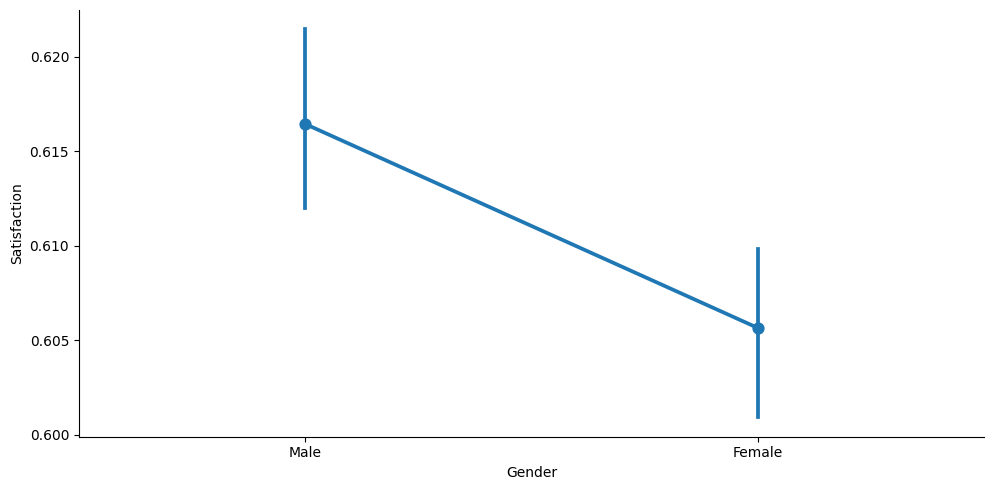

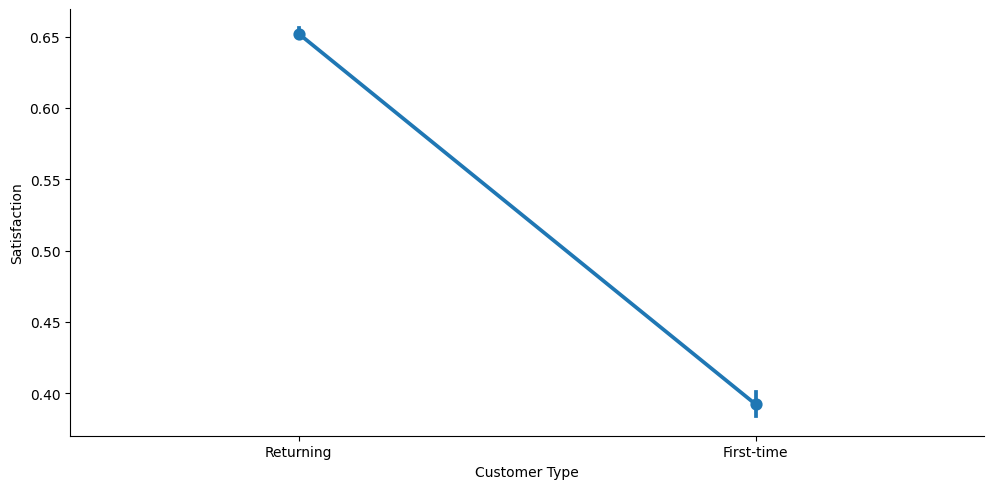

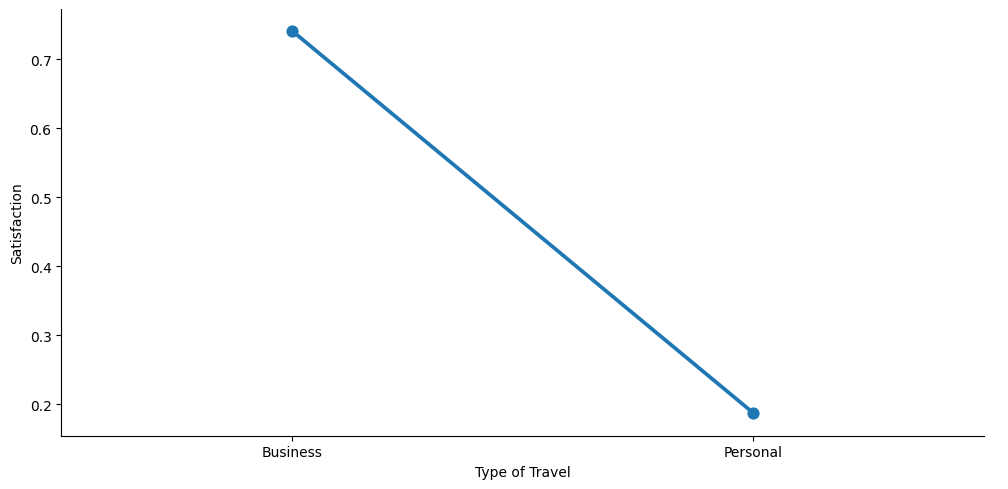

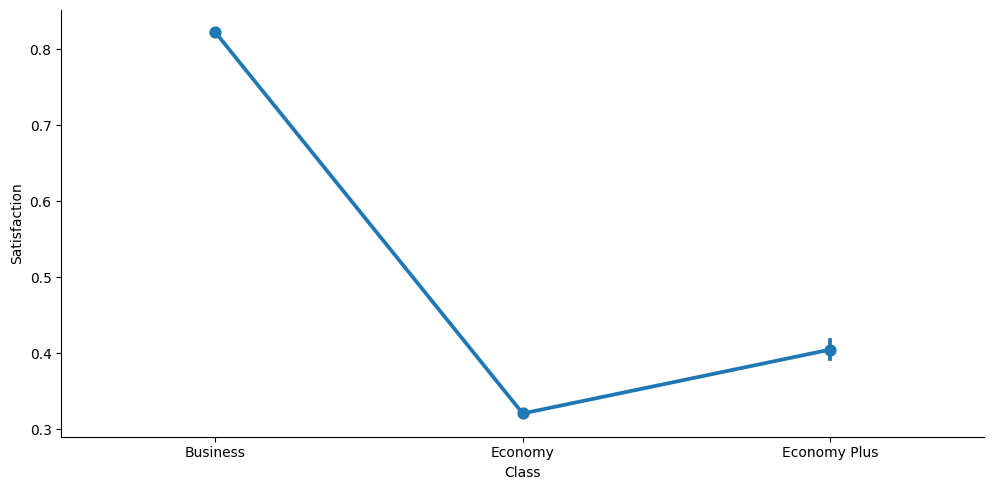

In [ ]:
for i, col in enumerate(cols):
  plt.figure(i)
  sns.catplot(x=col, y='Satisfaction', data=df_cat, kind='point', aspect=2)

Видим, что все столбцы кроме gender довольно критично влияют на итоговую оценку, при том разброс значений очень маленький. Удовлетворенность мужчин и женщин отличается в пределах разброса значений, но мужчины чуть довольнее, это может быть связано с тем, что число мужчин в бизнес классе больше, чем женщин. Рассмотрим, в каких классах кого больше летало

In [ ]:
df_cat['Gender'] = df_cat['Gender'].replace(['Female', 'Male'], [0, 1]).astype(int)
df_c['Gender'] = df_c['Gender'].replace(['Female', 'Male'], [0, 1]).astype(int)

cols = ['Class', 'Customer Type', 'Type of Travel']
for col in cols:
  print(df_cat.groupby(col)['Gender'].mean())

Class
Business        0.499223
Economy         0.491105
Economy Plus    0.476137
Name: Gender, dtype: float64
Customer Type
First-time    0.462918
Returning     0.500769
Name: Gender, dtype: float64
Type of Travel
Business    0.492742
Personal    0.501400
Name: Gender, dtype: float64


<ipython-input-22-b9ec9228d373>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat['Gender'] = df_cat['Gender'].replace(['Female', 'Male'], [0, 1]).astype(int)
<ipython-input-22-b9ec9228d373>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c['Gender'] = df_c['Gender'].replace(['Female', 'Male'], [0, 1]).astype(int)


Летало примерно поровну, скорее всего пол не влияет на оценку, однако у нас ещё есть вещественные признаки, возможно там мы увидим разницу

In [ ]:
df_c

,Gender,Customer Type,Type of Travel,Class
0,0,First-time,Business,Economy
1,0,First-time,Business,Economy
2,0,Returning,Personal,Economy
3,1,Returning,Personal,Business
4,1,Returning,Business,Business
...,...,...,...,...
44908,1,Returning,Business,Business
44909,0,First-time,Business,Economy
44910,1,Returning,Business,Economy
44911,0,First-time,Business,Business


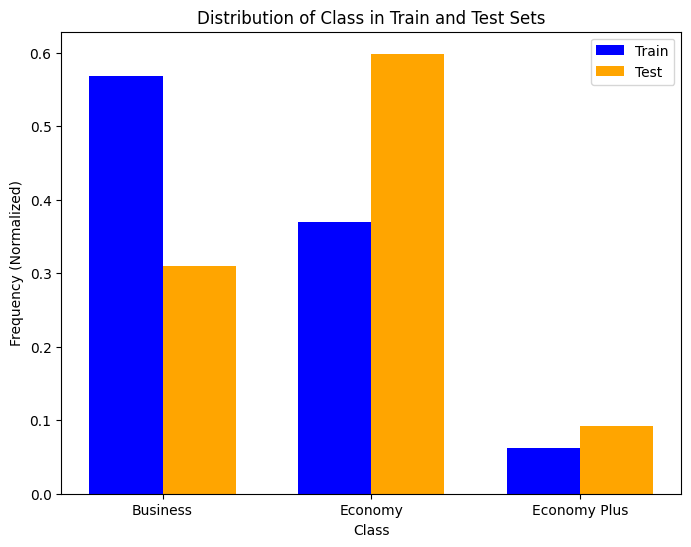

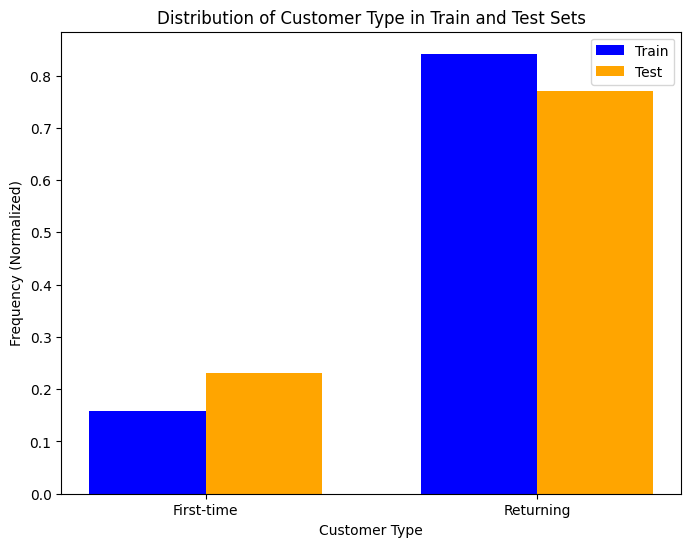

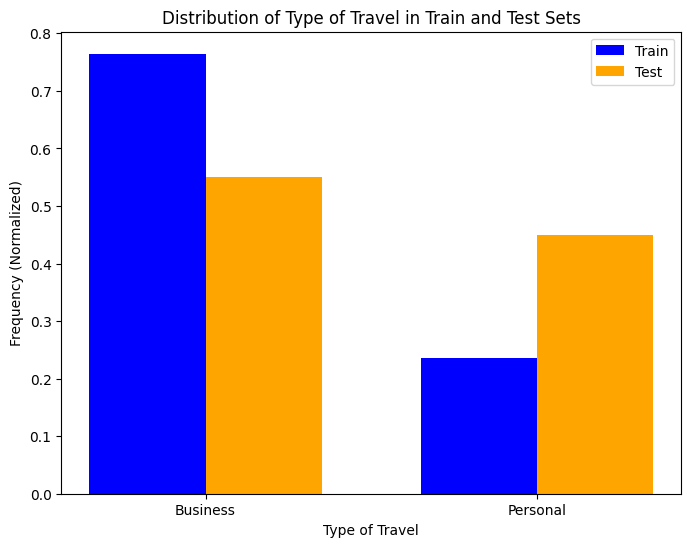

In [ ]:
keys = ['Class', 'Customer Type', 'Type of Travel']

# Итерируемся по каждому ключу
for key in keys:
    # Создаем фигуру для текущего признака
    plt.figure(figsize=(8, 6))

    # Считаем частоты для тренировочной и тестовой выборок
    train_counts = df_cat[key].value_counts(normalize=True).sort_index()
    test_counts = df_c[key].value_counts(normalize=True).sort_index()

    # Ширина столбцов
    bar_width = 0.35

    # Позиции для столбцов
    x = range(len(train_counts))

    # Строим столбцы для тренировочной выборки
    plt.bar([i - bar_width/2 for i in x], train_counts, width=bar_width, color='blue', label='Train')

    # Строим столбцы для тестовой выборки
    plt.bar([i + bar_width/2 for i in x], test_counts, width=bar_width, color='orange', label='Test')

    # Настройка графика
    plt.title(f'Distribution of {key} in Train and Test Sets')
    plt.xlabel(key)
    plt.ylabel('Frequency (Normalized)')
    plt.xticks(x, train_counts.index)  # Устанавливаем метки категорий на оси X
    plt.legend()

    # Отображаем график
    plt.show()

In [ ]:
df_cat = pd.get_dummies(df_cat).astype(int)
df_c = pd.get_dummies(df_c).astype(int)
df_cat

,Gender,Satisfaction,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1,1,0,1,1,0,1,0,0
1,1,0,0,1,1,0,1,0,0
2,0,1,0,1,1,0,1,0,0
3,0,1,0,1,1,0,0,1,0
4,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
84962,1,0,1,0,1,0,1,0,0
84963,1,0,0,1,0,1,0,0,1
84964,0,0,0,1,0,1,0,1,0
84965,1,1,0,1,1,0,1,0,0


#Обработка вещественных признаков

In [ ]:
df_num = df_train.select_dtypes(exclude=['object']).copy()
df_n = df_test.select_dtypes(exclude=['object']).copy()

df_num['Satisfaction'] = df_cat['Satisfaction']
columns_to_check = df_num.columns.tolist()[5:]
mask = ((df_num[columns_to_check] >= 0) & (df_num[columns_to_check] <= 5)).all(axis=1)
df_num = df_num.loc[mask]
df_num

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,46,1608,0,0.0,1,1,5,4,1,5,5,5,3,2,5,1,5,5,1
1,56913,30,1379,30,32.0,5,5,1,1,5,3,1,5,1,1,3,1,1,3,0
2,6541,50,414,0,0.0,5,4,4,4,5,4,5,4,5,3,4,5,4,4,1
3,40646,48,95,0,0.0,3,3,1,2,3,5,1,5,2,1,5,5,5,5,1
4,29947,24,143,0,0.0,5,0,4,0,4,5,1,2,1,1,3,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,53730,49,1310,0,0.0,3,3,3,4,3,4,3,2,3,3,4,4,3,4,0
84963,82113,7,650,0,0.0,3,2,2,2,3,2,1,4,1,1,4,2,1,3,0
84964,54411,19,363,0,0.0,5,3,5,3,3,5,5,3,5,5,5,3,5,5,0
84965,15247,58,3445,9,5.0,1,1,3,4,1,5,5,5,3,5,5,1,5,5,1


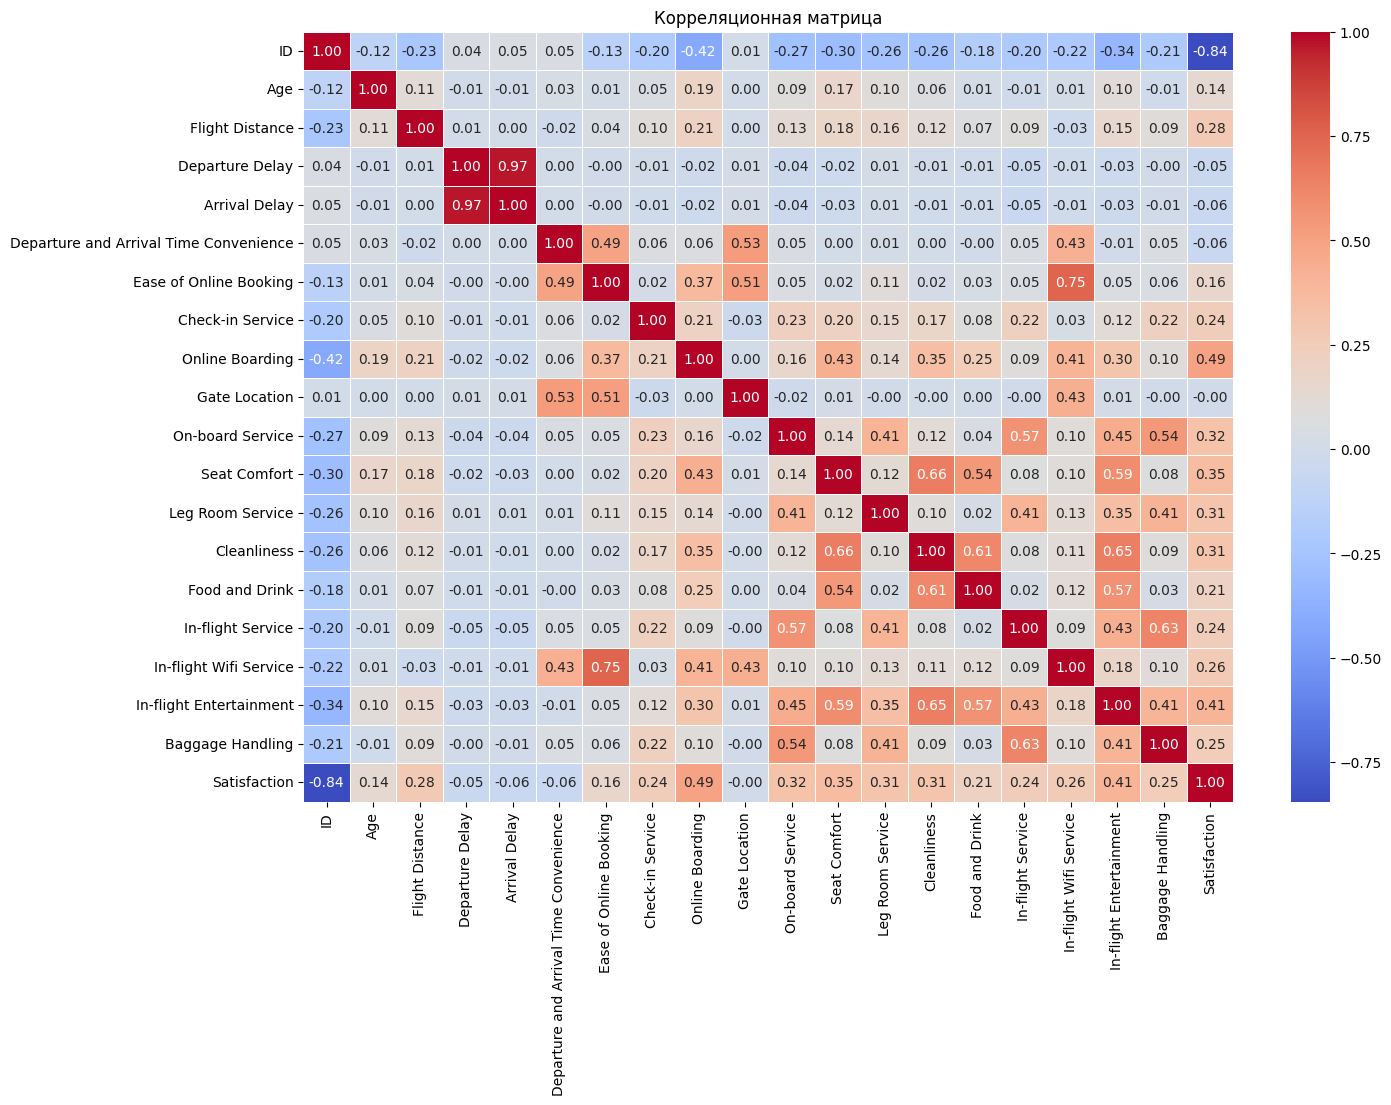

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df_num.iloc[:, 1:19]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

pca = PCA()
pca.fit(features_standardized)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.21490676 0.14107396 0.12107216 0.10907683 0.06699859 0.05281344
 0.0501693  0.04907201 0.03566076 0.02588248 0.0255567  0.0251525
 0.02030728 0.01922062 0.01726052 0.01308448 0.01080809 0.00188355]


In [ ]:
pca = PCA(n_components=14)
principal_components = pca.fit_transform(features_standardized)

pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(14)], index=df_num.index)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.21490676 0.14107396 0.12107216 0.10907683 0.06699859 0.05281344
 0.0501693  0.04907201 0.03566076 0.02588248 0.0255567  0.0251525
 0.02030728 0.01922062]


In [ ]:
pca_df['Satisfaction'] = df_num['Satisfaction']
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Satisfaction
0,1.376582,-3.172852,1.666833,-0.229665,1.066389,0.541624,0.026187,-0.434520,0.240106,0.279590,-0.836755,-0.218553,0.051539,0.021736,1
1,-3.518702,2.440429,2.132143,0.647563,-0.304433,-1.688576,0.197075,1.271173,1.291761,0.684552,-0.281235,0.072469,-0.050502,-0.473384,0
2,2.036626,1.976317,-0.282828,-0.537084,-0.282349,-0.105798,0.938760,-0.939698,0.364028,0.184564,-0.873763,-0.173276,-0.015805,0.605367,1
3,-0.225244,0.778640,3.351912,-0.313351,-0.902993,-2.230352,-1.286848,-1.281646,-0.039057,-0.122675,0.130269,0.293991,0.050374,1.144614,1
4,-3.866504,-0.383482,3.134611,-0.425064,-1.410375,0.551608,2.608889,0.333307,-0.712513,0.834624,-0.436676,0.512628,-1.497527,-0.364918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,-0.244179,0.627437,0.281214,-0.593766,0.435191,-0.110733,-0.233009,-0.453802,-1.374974,-0.330379,0.164669,0.149311,-0.073020,0.126228,0
84963,-3.972881,0.536000,2.005394,-0.553109,-1.072860,0.386429,-1.020024,0.930673,0.835711,0.498164,-0.296108,-0.596378,0.663328,-0.437822,0
84964,2.490073,-0.291430,0.164245,-0.435284,-2.351197,1.369850,1.107830,0.009726,-0.502971,0.667162,0.253532,0.138091,-0.108318,0.039817,0
84965,2.010594,-3.407418,0.584247,0.011251,1.406326,-1.366814,-0.338370,0.803153,-0.279316,-0.150599,0.704161,0.004960,-0.088670,-1.029099,1


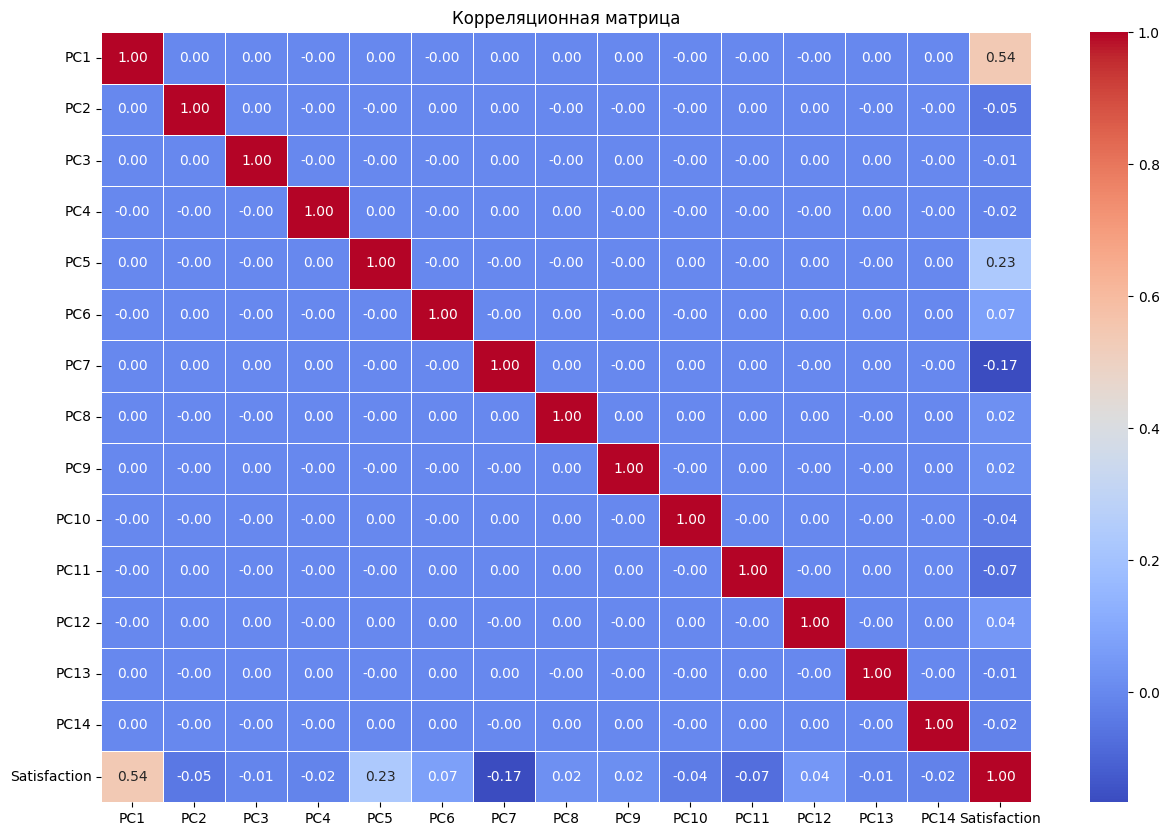

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(pca_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

In [ ]:
df_n

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,46,978,0,8.0,3,3,1,3,1,4,5,4,5,5,1,3,5,2
1,107961,21,1005,0,20.0,1,1,4,1,3,3,4,4,4,4,4,1,4,4
2,129503,39,954,18,3.0,5,1,3,1,2,4,5,3,3,3,5,1,3,5
3,92408,22,765,0,0.0,5,2,4,2,3,5,2,2,2,2,5,2,2,5
4,117611,48,2123,9,0.0,4,4,3,4,4,2,4,2,3,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,117154,64,1947,27,17.0,5,5,1,2,5,1,3,1,2,1,1,1,1,1
44909,101603,23,1180,0,0.0,4,4,2,4,1,3,1,5,2,2,4,4,2,4
44910,105970,50,451,0,0.0,2,2,3,1,2,2,1,5,1,1,1,1,1,1
44911,89524,49,227,4,9.0,2,2,2,2,3,1,5,5,3,3,3,2,3,4


In [ ]:
X_test = df_n.iloc[:, 1:19]  # Признаки для PCA

X_test_standardized = scaler.transform(X_test)

# Применение PCA к тестовым данным с использованием обученных коэффициентов
test_pca = pca.transform(X_test_standardized)
test_pca_df = pd.DataFrame(data=test_pca, columns=[f'PC{i+1}' for i in range(14)])
test_pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.206500,-0.788559,-2.821821,-0.566507,-0.439181,-1.817765,-1.037040,-0.477475,0.745236,1.496777,0.647891,1.294716,-0.837961,0.720544
1,-0.579151,-2.249211,0.047968,-0.069684,-1.740643,0.308122,0.614182,0.816885,1.058687,-0.837504,-0.390378,-0.041670,-0.000824,0.104852
2,-0.435251,-1.415449,1.154221,-0.032257,-1.149835,-0.539253,1.745593,0.126319,-0.671976,1.242243,0.166357,-0.991209,0.008283,-0.105779
3,-1.383162,0.187723,2.685227,-0.427876,-1.186640,1.041089,1.132513,0.354162,-1.437987,0.757649,0.162260,0.073476,-0.151156,-0.185264
4,-2.103858,1.610826,-1.271893,-0.610328,1.727866,-0.087303,0.561834,0.635898,-0.289369,0.541311,-1.170283,-0.377583,0.091949,0.376013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,-4.419678,2.841950,-1.815404,-0.134201,1.640368,-2.017938,1.376332,0.604410,-0.502467,0.311466,-0.669009,-0.274491,0.078758,0.256117
44909,-1.459237,1.086087,1.921195,-0.456268,0.076837,0.238896,-2.274496,0.138316,0.552836,1.167217,1.297918,-0.579520,0.116326,0.161201
44910,-5.070736,-0.217982,0.462818,-0.646660,1.299024,-0.607015,0.125556,-0.670255,2.478383,0.332721,0.297473,0.907362,-0.097807,0.298724
44911,-1.291640,-0.683272,-0.617448,-0.314120,-0.344464,-1.352614,0.004234,-0.719716,1.742773,-0.349181,-0.520111,-1.699161,-0.356487,-0.207600


In [ ]:
df_cat = df_cat.drop(columns=['Satisfaction'])

In [ ]:
df = pd.concat([pca_df, df_cat], axis=1)
df_test = pd.concat([test_pca_df, df_c], axis=1)
df_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Gender,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,0.206500,-0.788559,-2.821821,-0.566507,-0.439181,-1.817765,-1.037040,-0.477475,0.745236,1.496777,0.647891,1.294716,-0.837961,0.720544,0,1,0,1,0,0,1,0
1,-0.579151,-2.249211,0.047968,-0.069684,-1.740643,0.308122,0.614182,0.816885,1.058687,-0.837504,-0.390378,-0.041670,-0.000824,0.104852,0,1,0,1,0,0,1,0
2,-0.435251,-1.415449,1.154221,-0.032257,-1.149835,-0.539253,1.745593,0.126319,-0.671976,1.242243,0.166357,-0.991209,0.008283,-0.105779,0,0,1,0,1,0,1,0
3,-1.383162,0.187723,2.685227,-0.427876,-1.186640,1.041089,1.132513,0.354162,-1.437987,0.757649,0.162260,0.073476,-0.151156,-0.185264,1,0,1,0,1,1,0,0
4,-2.103858,1.610826,-1.271893,-0.610328,1.727866,-0.087303,0.561834,0.635898,-0.289369,0.541311,-1.170283,-0.377583,0.091949,0.376013,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44908,-4.419678,2.841950,-1.815404,-0.134201,1.640368,-2.017938,1.376332,0.604410,-0.502467,0.311466,-0.669009,-0.274491,0.078758,0.256117,1,0,1,1,0,1,0,0
44909,-1.459237,1.086087,1.921195,-0.456268,0.076837,0.238896,-2.274496,0.138316,0.552836,1.167217,1.297918,-0.579520,0.116326,0.161201,0,1,0,1,0,0,1,0
44910,-5.070736,-0.217982,0.462818,-0.646660,1.299024,-0.607015,0.125556,-0.670255,2.478383,0.332721,0.297473,0.907362,-0.097807,0.298724,1,0,1,1,0,0,1,0
44911,-1.291640,-0.683272,-0.617448,-0.314120,-0.344464,-1.352614,0.004234,-0.719716,1.742773,-0.349181,-0.520111,-1.699161,-0.356487,-0.207600,0,1,0,1,0,1,0,0


In [ ]:
df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Satisfaction,Gender,Customer Type_First-time,Customer Type_Returning,Type of Travel_Business,Type of Travel_Personal,Class_Business,Class_Economy,Class_Economy Plus
0,1.376582,-3.172852,1.666833,-0.229665,1.066389,0.541624,0.026187,-0.434520,0.240106,0.279590,-0.836755,-0.218553,0.051539,0.021736,1,1,0,1,1,0,1,0,0
1,-3.518702,2.440429,2.132143,0.647563,-0.304433,-1.688576,0.197075,1.271173,1.291761,0.684552,-0.281235,0.072469,-0.050502,-0.473384,0,1,0,1,1,0,1,0,0
2,2.036626,1.976317,-0.282828,-0.537084,-0.282349,-0.105798,0.938760,-0.939698,0.364028,0.184564,-0.873763,-0.173276,-0.015805,0.605367,1,0,0,1,1,0,1,0,0
3,-0.225244,0.778640,3.351912,-0.313351,-0.902993,-2.230352,-1.286848,-1.281646,-0.039057,-0.122675,0.130269,0.293991,0.050374,1.144614,1,0,0,1,1,0,0,1,0
4,-3.866504,-0.383482,3.134611,-0.425064,-1.410375,0.551608,2.608889,0.333307,-0.712513,0.834624,-0.436676,0.512628,-1.497527,-0.364918,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84962,-0.244179,0.627437,0.281214,-0.593766,0.435191,-0.110733,-0.233009,-0.453802,-1.374974,-0.330379,0.164669,0.149311,-0.073020,0.126228,0,1,1,0,1,0,1,0,0
84963,-3.972881,0.536000,2.005394,-0.553109,-1.072860,0.386429,-1.020024,0.930673,0.835711,0.498164,-0.296108,-0.596378,0.663328,-0.437822,0,1,0,1,0,1,0,0,1
84964,2.490073,-0.291430,0.164245,-0.435284,-2.351197,1.369850,1.107830,0.009726,-0.502971,0.667162,0.253532,0.138091,-0.108318,0.039817,0,0,0,1,0,1,0,1,0
84965,2.010594,-3.407418,0.584247,0.011251,1.406326,-1.366814,-0.338370,0.803153,-0.279316,-0.150599,0.704161,0.004960,-0.088670,-1.029099,1,1,0,1,1,0,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import copy
import datetime as dt


train = df.drop(columns=['Satisfaction'])
test = df['Satisfaction']
val =

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size, n_hidden_neurons, dropout_prob=0.2,):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, n_hidden_neurons)
        self.bn1 = nn.BatchNorm1d(n_hidden_neurons)
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons - 64)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons - 64)
        self.fc3 = nn.Linear(n_hidden_neurons - 64, n_hidden_neurons-32)
        self.bn3 = nn.BatchNorm1d(n_hidden_neurons-32)
        self.fc4 = nn.Linear(n_hidden_neurons-32, 1)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.dropout(x)

        x = self.fc4(x)
        x = torch.sigmoid(x)
        return x.view(-1)

In [ ]:
class Trainer():
    """
    Parameters:
        dataset: класс, хранящий данные
        loss_f: функция потерь
        learning_rate: величина градиентного шага
        epoch_amount: общее количество эпох
        batch_size: размер одного бача
        max_batches_per_epoch: максимальное количество бачей,
                               подаваемых в модель в одну эпоху
        device: устройство для вычислений
        early_stopping: количество эпох без улучшений до остановки обучения
        optim: оптимизатор
        scheduler: регулятор градиентного шага
        permutate: перемешивание тренировочной выборки перед обучением

    Attributes:
        start_model: необученная модель
        best_model: модель, после обучения
        train_loss: средние значения функции потерь на тренировочных
                    данных в каждой эпохе
        val_loss: средние значения функции потерь на валидационных
                  данных в каждой эпохе

    Methods:
        fit: обучение модели
        predict: возвращает предсказание обученной моделью

    """

    # это классический конструктор класса, он учитывает много различных
    # параметров, часть из которых задаётся по умолчанию
    def __init__(self,  dataset, net, loss_f, learning_rate=1e-3,
                epoch_amount=10, batch_size=1000,
                max_batches_per_epoch=None,
                device='cpu', early_stopping=10,
                optim=torch.optim.Adam,
                scheduler=None, permutate=True):

        self.loss_f = loss_f
        self.learning_rate = learning_rate
        self.epoch_amount = epoch_amount
        self.batch_size = batch_size
        self.max_batches_per_epoch = max_batches_per_epoch
        self.device = device
        self.early_stopping = early_stopping
        self.optim = optim
        self.scheduler = scheduler
        self.permutate = permutate
        self.dataset = dataset
        self.start_model = net
        self.best_model = net

        self.train_loss = []
        self.val_loss = []


    def predict(self, X):
        return self.best_model.forward(X)

    def fit(self, X_train, X_test, y_train, y_test):

        Net = self.start_model
        device = torch.device(self.device)
        print(device)

        optimizer = self.optim(Net.parameters(), lr=self.learning_rate)

        if self.scheduler is not None:
            scheduler = self.scheduler(optimizer)

        train = self.dataset(X_train, y_train)
        val = self.dataset(X_test, y_test)

        train = DataLoader(train, batch_size=self.batch_size, shuffle=self.permutate)
        val = DataLoader(val, batch_size=self.batch_size, shuffle=False)

        best_val_loss = float('inf')
        best_ep = 0

        for epoch in range(self.epoch_amount):
            start = dt.datetime.now()
            print(f'Эпоха: {epoch}', end=' ')
            Net.train()
            mean_loss = 0
            batch_n = 0

            for batch_x, target in train:

                if self.max_batches_per_epoch is not None:
                    if batch_n >= self.max_batches_per_epoch:
                        break

                optimizer.zero_grad()

                batch_x = batch_x.to(self.device)
                target = target.to(self.device)

                predicted_values = self.predict(batch_x)
                loss = self.loss_f(predicted_values, target)
                loss.backward()
                optimizer.step()

                mean_loss += float(loss)
                batch_n += 1

            mean_loss /= batch_n
            self.train_loss.append(mean_loss)
            print(f'Loss_train: {mean_loss}, {dt.datetime.now() - start} сек')

            Net.eval()
            mean_loss = 0
            batch_n = 0

            with torch.no_grad():
                for batch_x, target in val:
                    if self.max_batches_per_epoch is not None:
                        if batch_n >= self.max_batches_per_epoch:
                            break

                    batch_x = batch_x.to(self.device)
                    target = target.to(self.device)

                    predicted_values = self.predict(batch_x)
                    loss = self.loss_f(predicted_values, target)

                    mean_loss += float(loss)
                    batch_n += 1

                mean_loss /= batch_n
                self.val_loss.append(mean_loss)
                print(f'Loss_val: {mean_loss}')

                if mean_loss < best_val_loss:
                    best_ep = epoch
                    self.best_model = Net
                    best_val_loss = mean_loss
                elif epoch - best_ep > self.early_stopping:
                    print(f'{self.early_stopping} без улучшений. Прекращаем обучение...')
                    break
                if self.scheduler is not None:
                    scheduler.step()
                print()

In [ ]:
class MyDataset(Dataset):

    def __init__(self, X, y):
        self.X = torch.from_numpy(X.values).float()
        self.y = torch.from_numpy(y.values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return (self.X[index], self.y[index])

In [ ]:
net = Net(X_test.shape[1], 128)

params = {
    'dataset': MyDataset,
    'net': net,
    'epoch_amount': 1500,
    'learning_rate': 1e-2,
    'early_stopping': 1500,
    'loss_f': nn.BCELoss(),
    'optim': torch.optim.Adam,
}

clf = Trainer(**params)
clf.fit(X_train, X_test, y_train, y_test)

cpu
Эпоха: 0 Loss_train: 0.23268819775651484, 0:00:05.006970 сек
Loss_val: 0.1696733692113091

Эпоха: 1 Loss_train: 0.17910317419206395, 0:00:03.046318 сек
Loss_val: 0.15555408202549992

Эпоха: 2 Loss_train: 0.16630633898517666, 0:00:01.083391 сек
Loss_val: 0.14214602989308975

Эпоха: 3 Loss_train: 0.15895412840387402, 0:00:01.101923 сек
Loss_val: 0.14057320487849853

Эпоха: 4 Loss_train: 0.15634412263684414, 0:00:01.393990 сек
Loss_val: 0.13817787521025715

Эпоха: 5 Loss_train: 0.14817946086473324, 0:00:01.062385 сек
Loss_val: 0.13260872179971023

Эпоха: 6 Loss_train: 0.14560112379053058, 0:00:01.526832 сек
Loss_val: 0.1311356122879421

Эпоха: 7 Loss_train: 0.14191234341877348, 0:00:02.071901 сек
Loss_val: 0.12544158407870462

Эпоха: 8 Loss_train: 0.13845130910768227, 0:00:01.416856 сек
Loss_val: 0.12512123321785645

Эпоха: 9 Loss_train: 0.13587857815710938, 0:00:01.073383 сек
Loss_val: 0.12293864698971019

Эпоха: 10 Loss_train: 0.1342383726116489, 0:00:01.433366 сек
Loss_val: 0.12448

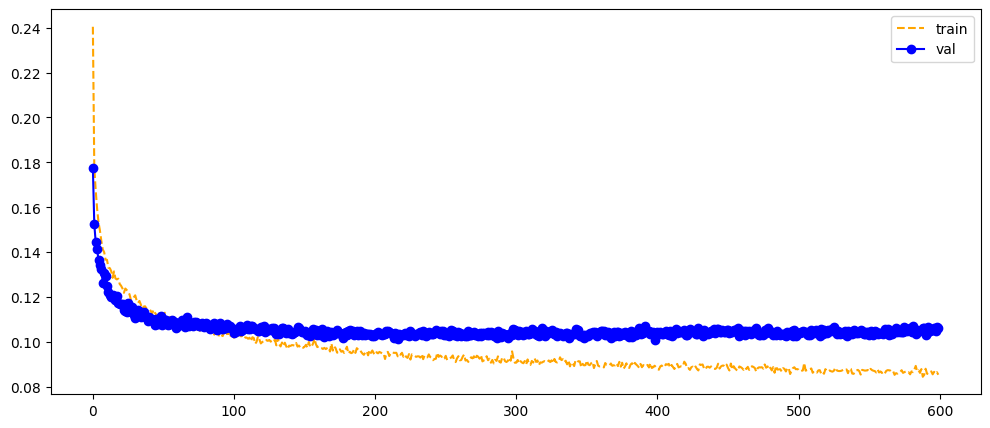

In [ ]:
def plot_loss(Loss_train, Loss_val):
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(Loss_train)), Loss_train, color='orange', label='train', linestyle='--')
    plt.plot(range(len(Loss_val)), Loss_val, color='blue', marker='o', label='val')
    plt.legend()
    plt.show()

plot_loss(clf.train_loss, clf.val_loss)

In [ ]:
y_pred = clf.predict(torch.from_numpy(df_test.values).float())
print(y_pred)

tensor([0.0089, 0.0042, 0.0226,  ..., 0.0130, 0.0003, 0.0013],
       grad_fn=<ViewBackward0>)


In [ ]:
df_test_for_id = pd.read_csv('/content/drive/MyDrive/kaggle_passangers/test.csv')
df_test_for_id.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,98190,Female,46,First-time,Business,Economy,978,0,8.0,3,3,1,3,1,4,5,4,5,5,1,3,5,2
1,107961,Female,21,First-time,Business,Economy,1005,0,20.0,1,1,4,1,3,3,4,4,4,4,4,1,4,4
2,129503,Female,39,Returning,Personal,Economy,954,18,3.0,5,1,3,1,2,4,5,3,3,3,5,1,3,5
3,92408,Male,22,Returning,Personal,Business,765,0,0.0,5,2,4,2,3,5,2,2,2,2,5,2,2,5
4,117611,Male,48,Returning,Business,Business,2123,9,0.0,4,4,3,4,4,2,4,2,3,1,2,2,2,2


In [ ]:
y_p = pd.Series(y_pred.detach().numpy())
id = df_test_for_id['ID']
out = pd.concat([id, y_p], axis=1)
out.columns = ['ID', 'Satisfaction']
out = out.round(0)
out = out.astype(int)
out

,ID,Satisfaction
0,98190,0
1,107961,0
2,129503,0
3,92408,0
4,117611,0
...,...,...
44908,117154,0
44909,101603,1
44910,105970,0
44911,89524,0


In [ ]:
out.to_csv('out_nn.csv', header=True, index=False)